# Setup

In [1]:
library ("ggplot2")
library ("dplyr") 
library ("tibble") 
library ("tidyr") 
library ("ALFAM2")

source ("../../01_functions/functions.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [2]:
packageVersion("ALFAM2")

[1] ‘4.2’

# Data

In [3]:
load (file = "../00_data_preparation/processed_data/data.Rdata")

In [4]:
head (data, n = 2) %>% embed

e.cum,e.rel,j.NH3,pmid,eid,exper,field,meas.tech,country,inst,ct,dt,air.temp,wind.2m,rain.rate,tan.app,app.rate,man.dm,man.ph,man.source,t.incorp,app.mthd,incorp
7.1480,0.0585374,1.7870,182,44,1,NA,micro met,DK,104,4,4,8.20,8.10,0,122.11,31.8,3.7,7.35,pig,1000,bc,none
8.2921,0.0679068,0.0673,182,44,1,NA,micro met,DK,104,21,17,4.45,3.98,0,122.11,31.8,3.7,7.35,pig,1000,bc,none


In [5]:
data = data %>% 
    mutate (wind.sqrt = sqrt (wind.2m))

In [6]:
load (file = "../00_data_preparation/processed_data/list_test_pmids.Rdata")

# Predictions on the test sets

In [7]:
pred <- alfam2(
    data, pars = alfam2pars03, app.name = 'tan.app', time.name = 'ct', 
    group = 'pmid', time.incorp = 't.incorp'
)

Default parameters (Set 3) are being used.

Incorporation applied for groups: 1500, 1501, 1506, 1507, 1515, 1518, 1522, 1524, 1527, 2233, 2234, 2235, 2456, 2543, 2544, 2545, 2546, 2548, 2567, 2568, 2577, 2579, 2581, 2583, 3119, 3122, 3125, 3126, 3129, 3130, 3131, 3133, 3134, 3135, 3139, 3144, 3145, 3146, 3149, 3151, 3152, 3153, 3159, 3160, 3162, 3163, 3165, 3166, 3169, 3170, 3173, 3174, 3175, 3177, 3178, 3179.



In [8]:
p = length (list_test_pmids)
p

[1] 15

In [9]:
list_test_pmids[[1]]

[1]  196  200  195  982  957  965  958  927  940 1008 1009  984  972 1132 1155
[16] 1159 2272 1211 1192 1227 1194 1221 1228 1200 1408 1457 1491 1458 1471 1475
[31] 2459 1506 2464 1527 1534 1707 1735 1711 1687 1690 2236 2820 3168 3244 3183
[46] 3328 3311 2794 2852 3355 3257 2551 3134 2856 3296 3269 2848 2792 3191 3274
[61] 3243 3340 2783 2535 2548 2828 3277 3312 2851 2568 3325 3320 3354 3144

In [10]:
df_res_ALFAM2 = NULL

for (k in c (1 : p)){

    data_tmp = data %>%
        filter (pmid %in% list_test_pmids[[k]])

    pred = alfam2 (
        dat = data_tmp,
        pars = alfam2pars03,
        app.name = 'tan.app',
        time.name = 'ct',
        group = 'pmid', 
        time.incorp = 't.incorp'
    )

    data_tmp = data_tmp %>%
        mutate (prediction_ecum = pred$e) %>%
        mutate (sample = k)

    df_res_ALFAM2 = rbind (df_res_ALFAM2, data_tmp)
}

Default parameters (Set 3) are being used.

Incorporation applied for groups: 1506, 1527, 2548, 2568, 3134, 3144.

Default parameters (Set 3) are being used.

Incorporation applied for groups: 1506, 1524, 2234, 2456, 2568, 2577, 3135, 3153, 3163, 3173, 3174.

Default parameters (Set 3) are being used.

Incorporation applied for groups: 1522, 2543, 2545, 3126, 3139.

Default parameters (Set 3) are being used.

Incorporation applied for groups: 1501, 2234, 3151, 3153, 3165.

Default parameters (Set 3) are being used.

Incorporation applied for groups: 1515, 1527, 2543, 2548, 3144, 3146.

Default parameters (Set 3) are being used.

Incorporation applied for groups: 1524, 2233, 2568.

Default parameters (Set 3) are being used.

Incorporation applied for groups: 1527, 2456, 2577, 3160, 3179.

Default parameters (Set 3) are being used.

Incorporation applied for groups: 1522, 2235, 2544, 2579, 3144, 3153, 3165, 3166, 3170.

Default parameters (Set 3) are being used.

Incorporation applied fo

In [11]:
dim (df_res_ALFAM2)

[1] 9976   26

In [12]:
save (df_res_ALFAM2, file = "results/df_res_ALFAM2.Rdata")

# Predictions on scenarios

In [13]:
load (file = "../00_data_preparation/processed_data/scenarios_dynamic_rf.Rdata")

In [14]:
data %>% count (t.incorp, incorp)

t.incorp,incorp,n
<dbl>,<fct>,<int>
0.0,deep,25
0.0,shallow,525
0.5,shallow,18
1.5,shallow,18
23.0,shallow,6
24.0,deep,28
24.0,shallow,44
1000.0,none,5505


In [15]:
data %>% filter (incorp == "shallow") %>% head

,e.cum,e.rel,j.NH3,pmid,eid,exper,field,meas.tech,country,inst,⋯,rain.rate,tan.app,app.rate,man.dm,man.ph,man.source,t.incorp,app.mthd,incorp,wind.sqrt
,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,0.531,0.00877686,0.2655,1500,259,DERVAL(44)_2011,Derval,agm,FR,208,⋯,0,60.5,50,6.4,7.3,cat,0,bsth,shallow,1.459452
2,1.059,0.01750413,0.2640,1500,259,DERVAL(44)_2011,Derval,agm,FR,208,⋯,0,60.5,50,6.4,7.3,cat,0,bsth,shallow,1.783255
3,1.573,0.02600000,0.2570,1500,259,DERVAL(44)_2011,Derval,agm,FR,208,⋯,0,60.5,50,6.4,7.3,cat,0,bsth,shallow,1.786057
4,1.683,0.02781818,0.0550,1500,259,DERVAL(44)_2011,Derval,agm,FR,208,⋯,0,60.5,50,6.4,7.3,cat,0,bsth,shallow,1.187434
5,1.774,0.02932231,0.0455,1500,259,DERVAL(44)_2011,Derval,agm,FR,208,⋯,0,60.5,50,6.4,7.3,cat,0,bsth,shallow,1.311488
6,1.849,0.03056198,0.0375,1500,259,DERVAL(44)_2011,Derval,agm,FR,208,⋯,0,60.5,50,6.4,7.3,cat,0,bsth,shallow,1.104536


In [16]:
pred = alfam2 (
    dat = data %>% filter (pmid %in% c (1500, 3179, 182)),
    pars = alfam2pars03,
    app.name = 'tan.app',
    time.name = 'ct',
    group = 'pmid', 
    time.incorp = 't.incorp'
)


Default parameters (Set 3) are being used.

Incorporation applied for groups: 1500, 3179.



In [17]:
pred = alfam2 (
    dat = scenarios_dynamic_rf %>% mutate (wind.sqrt = sqrt (wind.2m)),
    pars = alfam2pars03,
    app.name = 'tan.app',
    time.name = 'ct',
    group = 'pmid', 
    time.incorp = 't.incorp'
)


Default parameters (Set 3) are being used.

Incorporation applied for groups: 1, 103, 109, 115, 121, 127, 13, 133, 139, 145, 151, 157, 163, 169, 175, 181, 187, 19, 193, 199, 205, 211, 217, 223, 229, 235, 241, 247, 25, 253, 259, 265, 271, 277, 283, 289, 295, 301, 307, 31, 313, 319, 325, 331, 337, 343, 349, 355, 361, 367, 37, 373, 379, 385, 391, 397, 403, 409, 415, 421, 427, 43, 433, 439, 445, 451, 457, 463, 469, 475, 481, 487, 49, 493, 499, 505, 511, 517, 523, 529, 535, 541, 547, 55, 553, 559, 565, 571, 577, 583, 589, 595, 601, 607, 61, 613, 619, 625, 631, 637, 643, 649, 655, 661, 667, 67, 673, 679, 685, 691, 697, 7, 703, 709, 715, 721, 727, 73, 733, 739, 745, 751, 757, 763, 79, 85, 91, 97.



In [18]:
df_efficacy = scenarios_dynamic_rf %>% 
    mutate (prediction_ecum = pred$e) %>%
    filter (ct == max (ct), .by = pmid) %>%
    mutate (efficacy = ((prediction_ecum / prediction_ecum[strategy == "Broadcast"]) - 1) * 100, 
            .by = c (scenario))

In [19]:
predictions_on_scenarios_ALFAM2 = df_efficacy %>%
    mutate (model = "ALFAM2")

save (predictions_on_scenarios_ALFAM2, file = "results/predictions_on_scenarios_ALFAM2.Rdata")

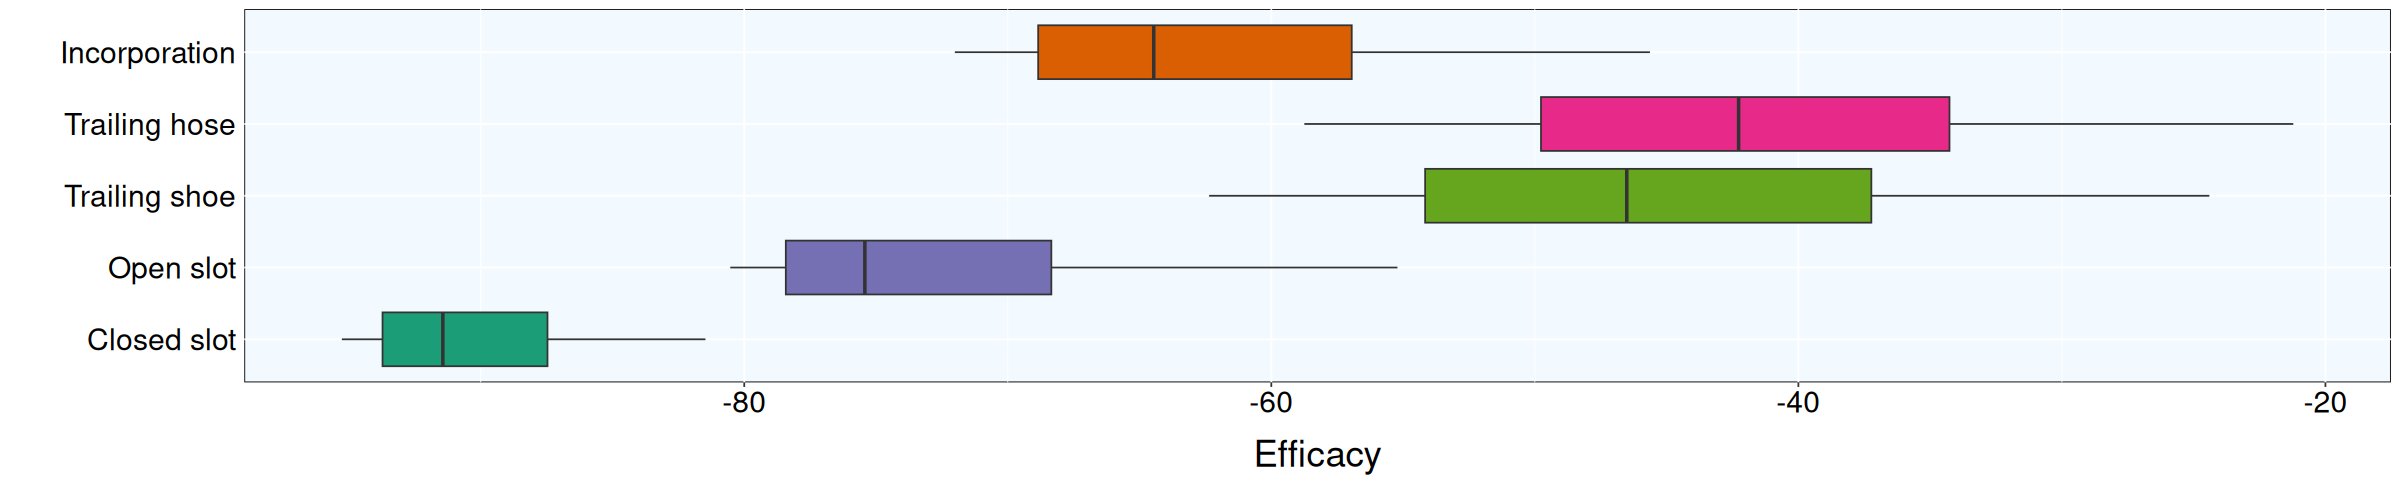

In [20]:
size (20, 4)
df_efficacy %>%
    filter (strategy != "Broadcast") %>%
    
    ggplot () +
        
        geom_boxplot (aes (x = efficacy, y = strategy, fill = strategy)) +
        scale_fill_manual (values = Dark2) +
        scale_y_discrete (limits = c ("Closed slot", "Open slot", "Trailing shoe", "Trailing hose", "Incorporation")) +
        ylab ("") + xlab ("Efficacy") +
        theme (legend.position = "none",
               axis.ticks.y = element_blank(),
               strip.text.x = element_text(margin = ggplot2::margin(t = 8, b = 8, r = 0, l = 0))) +
        # facet_wrap (~ method, ncol = 1) +
        NULL

# End